In [21]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sites = ['UKBB11026',
        'UKBB11027',
        'UKBB11025']

p_sex = './results_paper/sex/ukbb/'
p_age = './results_paper/sex/ukbb/'

sample_sizes = [50,100,200,500,1000]

# Sex

In [37]:
sex_tables = []
for k in sample_sizes:
    #############
    # LOAD DATA #
    #############

    # Single Task
    st_data = []
    for site in sites:
        folds = []
        for fold in range(5):
            p_parent = os.path.join(p_sex, f"single/{k}/{site}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
        st_data.append(folds)

    st_data = dict(zip(sites,st_data))

    # Multi-task
    mtl_data = []
    for fold in range(5):
        p_parent = os.path.join(p_sex, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

    ################
    # GET ACCURACY #
    ################

    # Single Task
    st_acc = []
    st_acc_std = []
    for site in sites:
        # Connectomes
        vals = [st_data[site][fold]['Accuracy/test'].iloc[-1] for fold in range(5)]
        st_acc.append(np.mean(vals))
        st_acc_std.append(np.std(vals))

    st_acc = pd.Series(st_acc,index=sites)
    st_acc_std = pd.Series(st_acc_std,index=sites)

    # Multi-task
    mtl_acc = []
    for fold in range(5):
        df = mtl_data[fold].transpose().reset_index()
        df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
        mtl_acc.append(df)
        
    mtl_acc_std = pd.concat(mtl_acc,axis=1).std(axis=1)
    mtl_acc = pd.concat(mtl_acc,axis=1).mean(axis=1)

    #########
    # TABLE #
    #########

    df = pd.concat([st_acc,mtl_acc,st_acc_std,mtl_acc_std],axis=1)
    df.columns = ['ST','MTL','ST_std','MTL_std']
    df['diff'] = df['MTL'] - df['ST']
    
    sex_tables.append(df)

In [39]:
sex_st_mean = [sex_tables[i].mean()['ST'] for i in range(len(sample_sizes))]
sex_mtl_mean = [sex_tables[i].mean()['MTL'] for i in range(len(sample_sizes))]

Text(0.5, 0, 'Sample size')

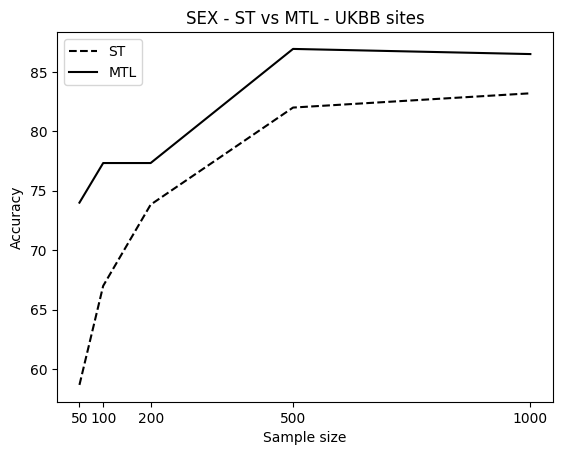

In [40]:
plt.plot(sample_sizes,sex_st_mean,label = 'ST',color='black',ls='--')
plt.plot(sample_sizes,sex_mtl_mean,label = 'MTL',color='black')
plt.legend()
plt.title('SEX - ST vs MTL - UKBB sites')
plt.xticks(sample_sizes)
plt.ylabel('Accuracy')
plt.xlabel('Sample size')

# Age

In [45]:
age_tables = []
for k in sample_sizes:
    #############
    # LOAD DATA #
    #############

    # Single Task
    st_data = []
    for site in sites:
        folds = []
        for fold in range(5):
            p_parent = os.path.join(p_age, f"single/{k}/{site}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
        st_data.append(folds)

    st_data = dict(zip(sites,st_data))

    # Multi-task
    mtl_data = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

    ################
    # GET LOSS #
    ################

    # Single Task
    st_acc = []
    st_acc_std = []
    for site in sites:
        # Connectomes
        vals = [st_data[site][fold]['Loss/test'].iloc[-1] for fold in range(5)]
        st_acc.append(np.mean(vals))
        st_acc_std.append(np.std(vals))

    st_acc = pd.Series(st_acc,index=sites)
    st_acc_std = pd.Series(st_acc_std,index=sites)

    # Multi-task
    mtl_acc = []
    for fold in range(5):
        df = mtl_data[fold].transpose().reset_index()
        df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
        mtl_acc.append(df)
        
    mtl_acc_std = pd.concat(mtl_acc,axis=1).std(axis=1)
    mtl_acc = pd.concat(mtl_acc,axis=1).mean(axis=1)

    #########
    # TABLE #
    #########

    df = pd.concat([st_acc,mtl_acc,st_acc_std,mtl_acc_std],axis=1)
    df.columns = ['ST','MTL','ST_std','MTL_std']
    df['diff'] = df['MTL'] - df['ST']
    
    age_tables.append(df)

In [47]:
age_st_mean = [age_tables[i].mean()['ST'] for i in range(len(sample_sizes))]
age_mtl_mean = [age_tables[i].mean()['MTL'] for i in range(len(sample_sizes))]

Text(0.5, 0, 'Sample size')

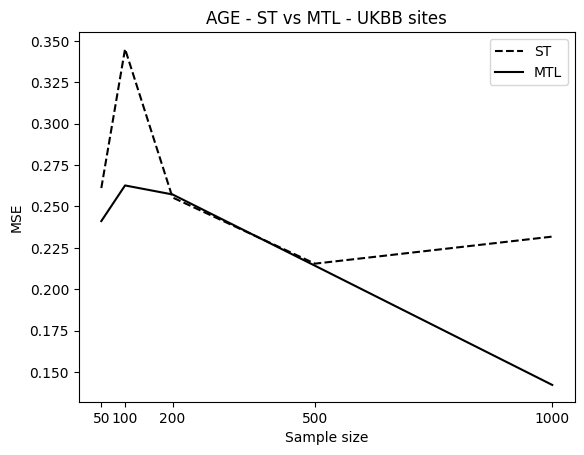

In [48]:
plt.plot(sample_sizes,age_st_mean,label = 'ST',color='black',ls='--')
plt.plot(sample_sizes,age_mtl_mean,label = 'MTL',color='black')
plt.legend()
plt.title('AGE - ST vs MTL - UKBB sites')
plt.xticks(sample_sizes)
plt.ylabel('MSE')
plt.xlabel('Sample size')